# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import missingno

from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV

import warnings
warnings.filterwarnings('ignore')

# Problem Statement

Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not.

# Read DataSet

In [3]:
df = pd.read_csv('Titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# EDA

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:>

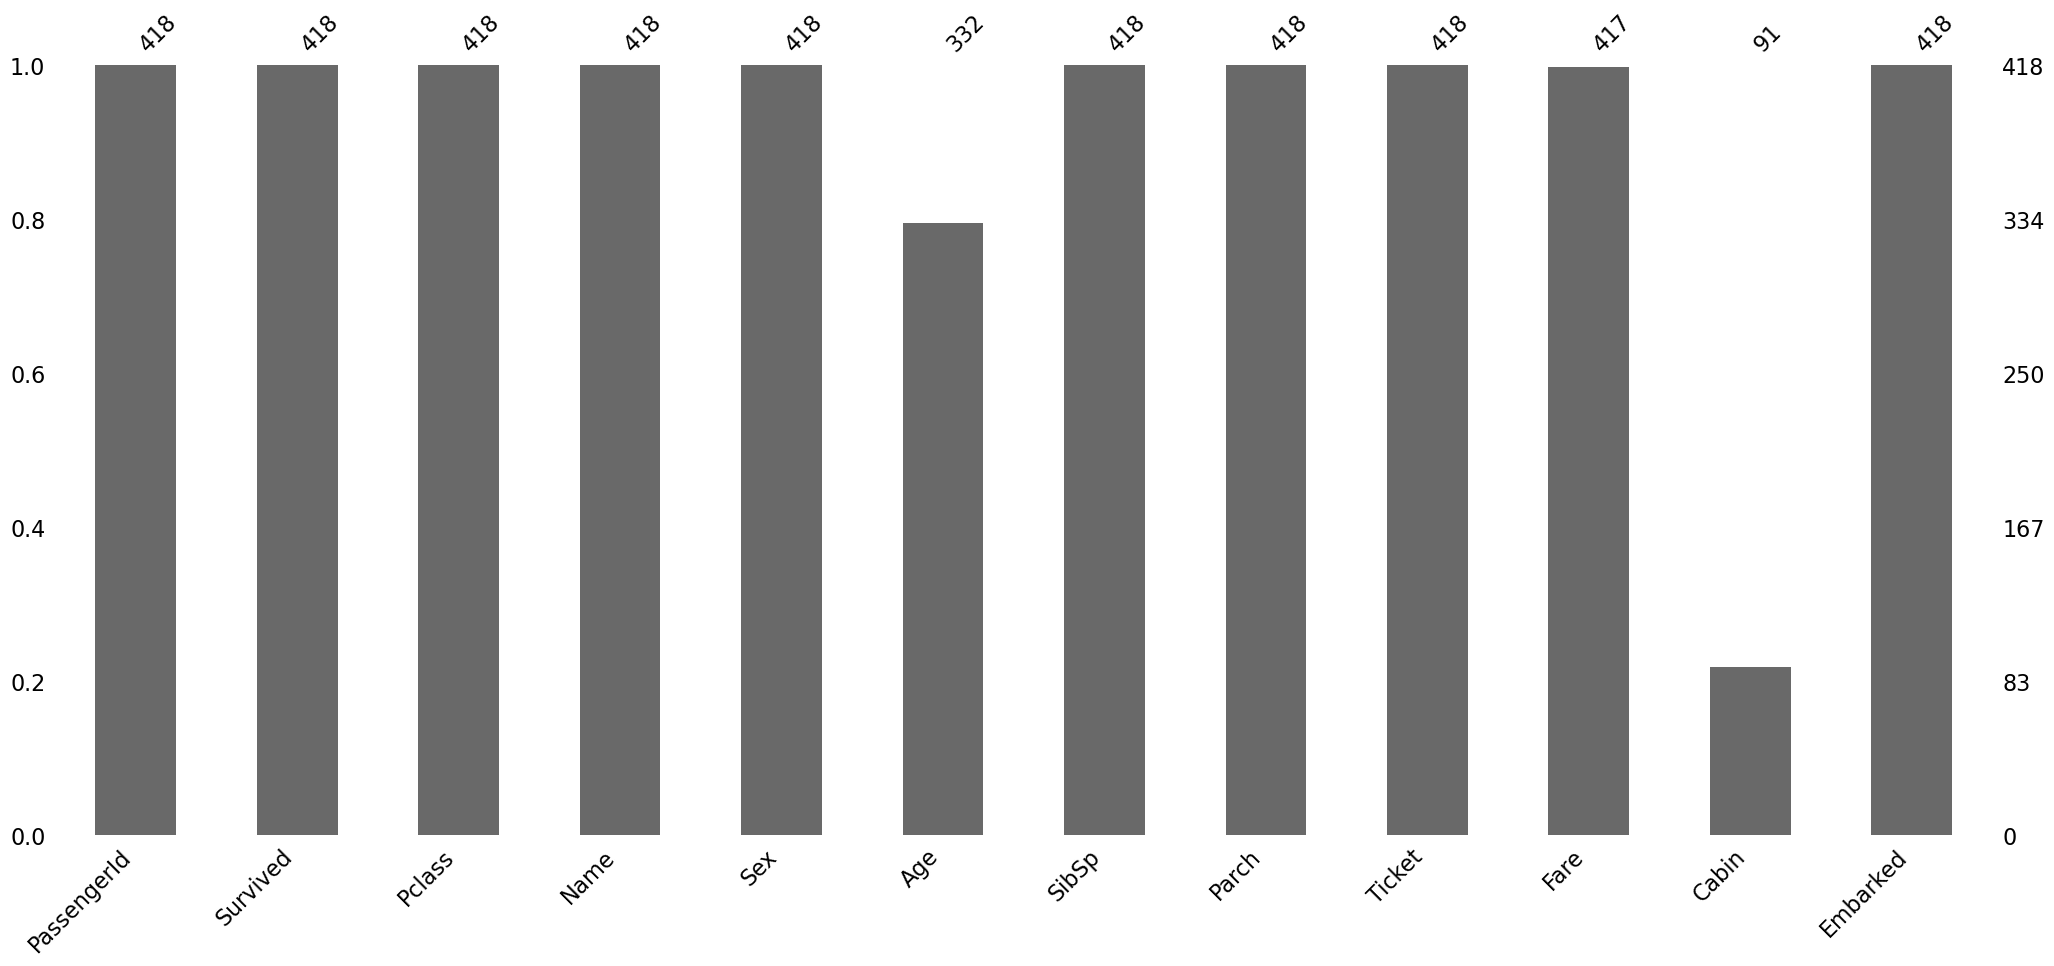

In [6]:
# "import missingno" is a Python code snippet that imports the missingno library. 
missingno.bar(df)

In [7]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


<AxesSubplot:xlabel='Age', ylabel='Density'>

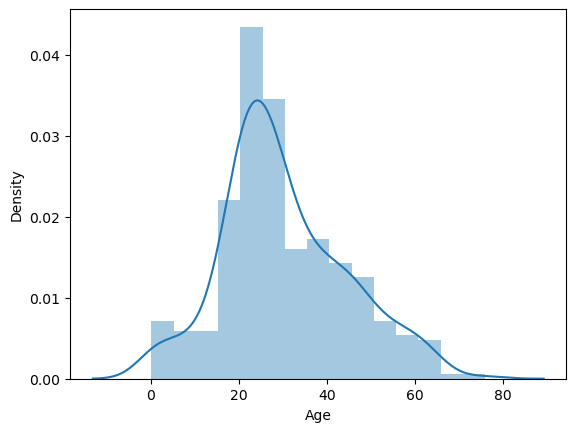

In [9]:
sns.distplot(df.Age)

Spliting the Dataset in Independent and Dependent variable

In [10]:
x = df.drop(['Survived','Cabin','Name','Ticket','PassengerId'],axis=1)
y = df['Survived']

By using for loop filling Categorical Missing value by Median and Continuous Missing value by Mode

In [11]:
for i in x.columns:
        if (x[i].dtype == object):
            mode = x[i].mode()[0]
            x[i] = x[i].fillna(mode)
        else:
            median = x[i].median()
            x[i] = x[i].fillna(median)         

By performing this transformation, the categorical data in the 'Sex' and 'Embarked' columns are now represented as numerical values, which can be easier to work with for certain machine learning algorithms that require numerical inputs. 

In [12]:
le = LabelEncoder()
x['Sex'] = le.fit_transform(x['Sex'])
x['Embarked'] = le.fit_transform(x['Embarked'])

 The MinMaxScaler is a feature scaling technique that scales the data to a specific range, typically between 0 and 1.

In [13]:
mm = MinMaxScaler()
x1 = pd.DataFrame(mm.fit_transform(x),columns = x.columns)

In [14]:
x1

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.452723,0.000,0.000000,0.015282,0.5
1,1.0,0.0,0.617566,0.125,0.000000,0.013663,1.0
2,0.5,1.0,0.815377,0.000,0.000000,0.018909,0.5
3,1.0,1.0,0.353818,0.000,0.000000,0.016908,1.0
4,1.0,0.0,0.287881,0.125,0.111111,0.023984,1.0
...,...,...,...,...,...,...,...
413,1.0,1.0,0.353818,0.000,0.000000,0.015713,1.0
414,0.0,0.0,0.512066,0.000,0.000000,0.212559,0.0
415,1.0,1.0,0.505473,0.000,0.000000,0.014151,1.0
416,1.0,1.0,0.353818,0.000,0.000000,0.015713,1.0


In [15]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [16]:
x.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [17]:
x['Sex'].unique()

array([1, 0])

In [18]:
x['Embarked'].unique()

array([1, 2, 0])

In [19]:
x.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

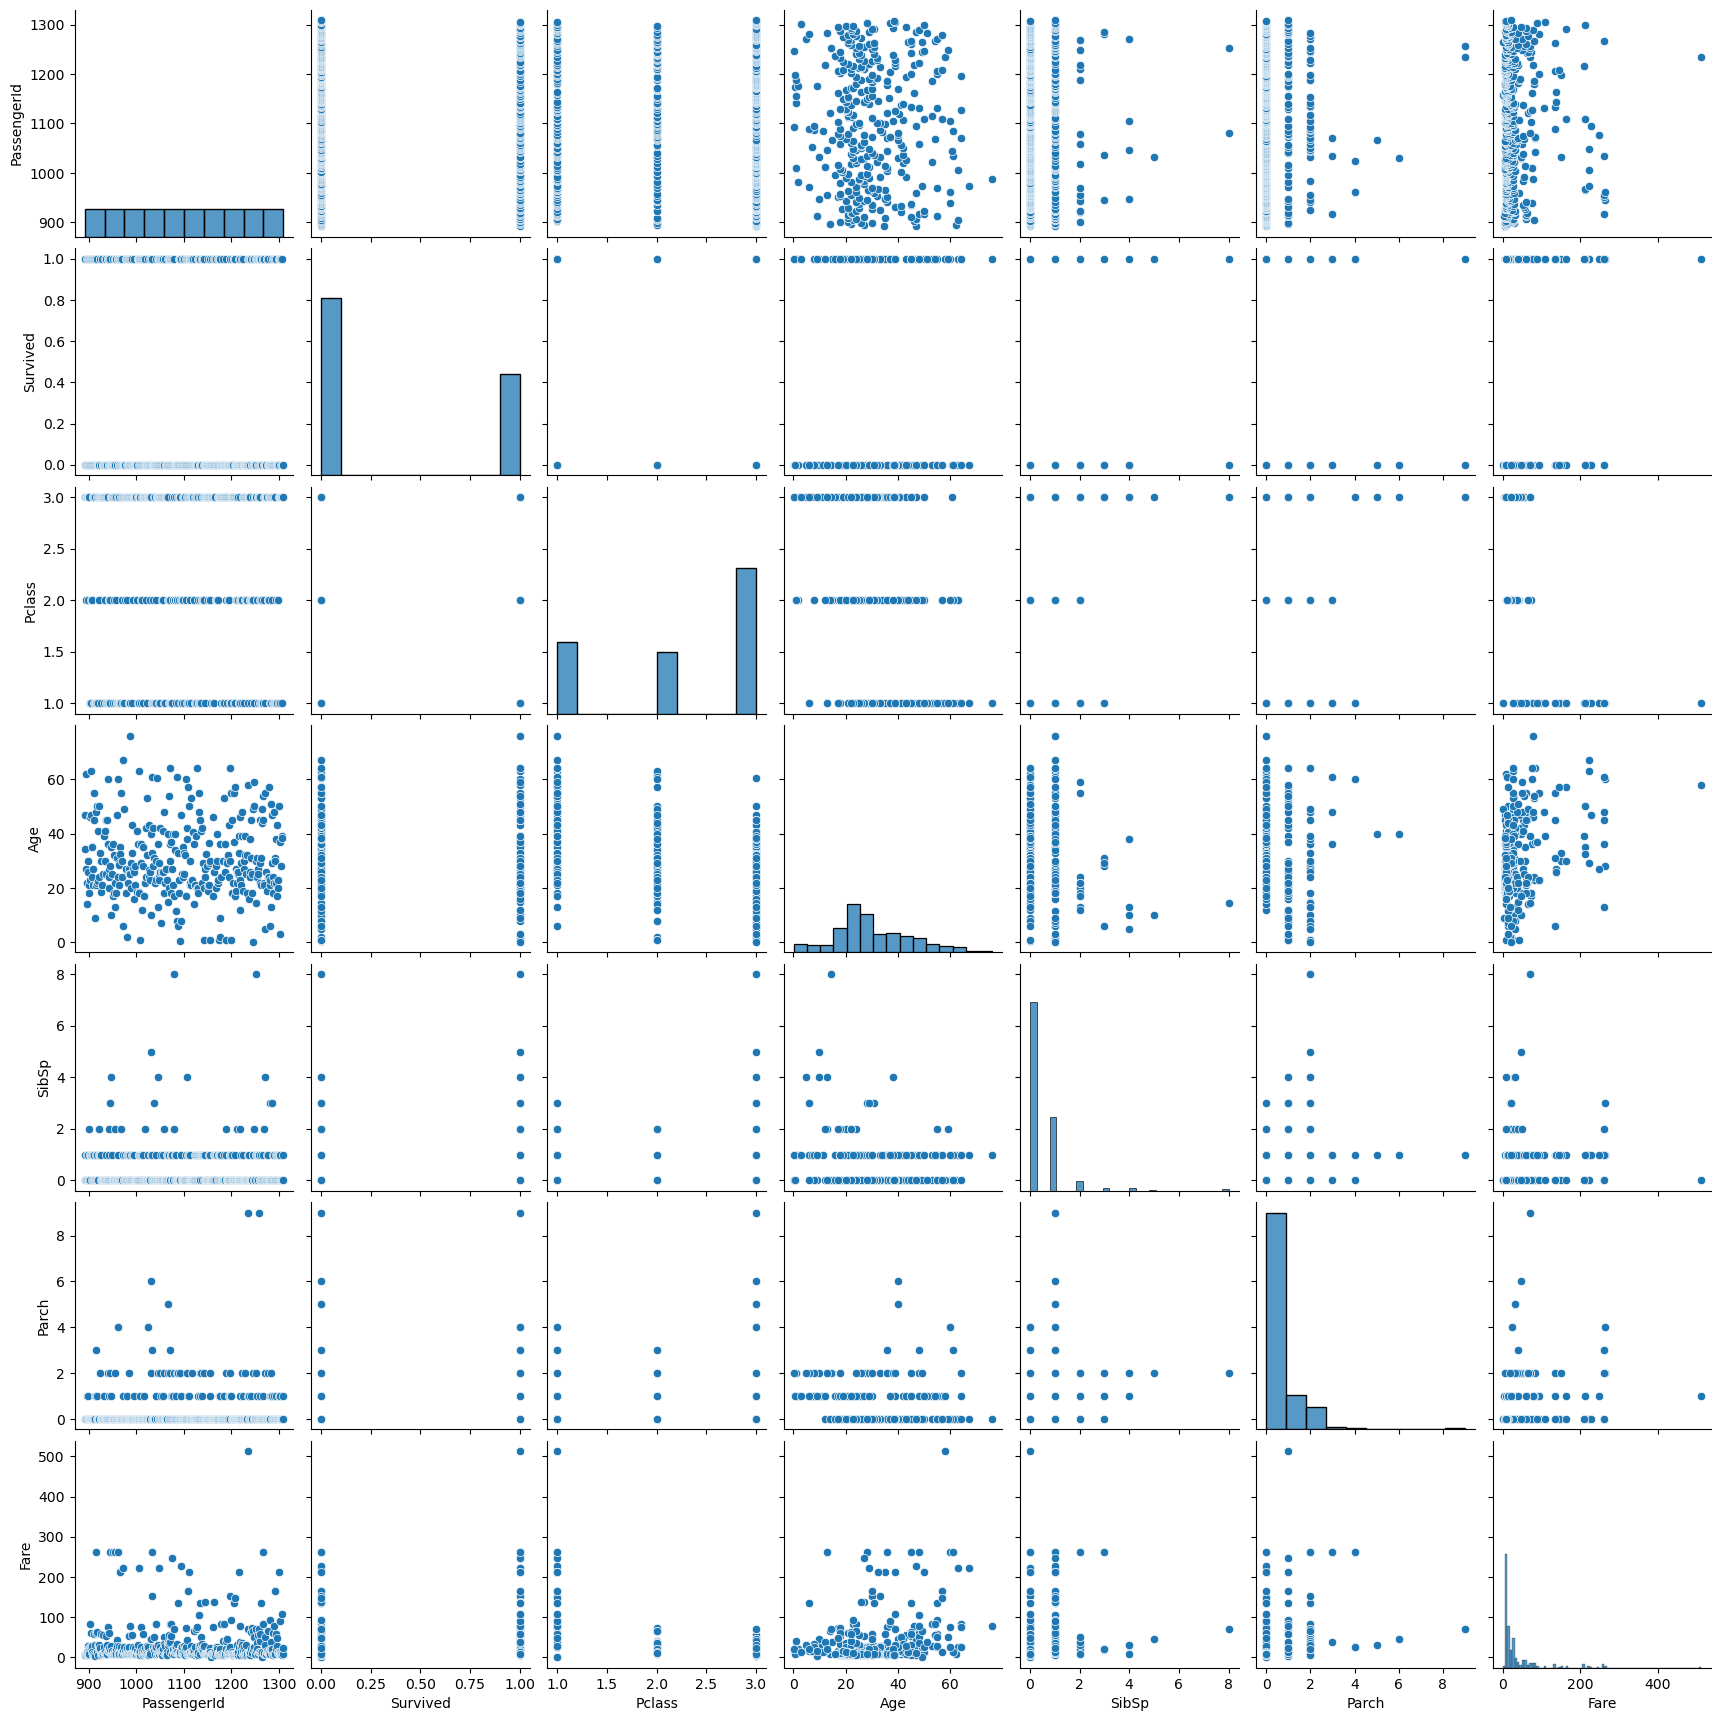

In [20]:
sns.pairplot(df)

## Plot the Survival Rate by Gender

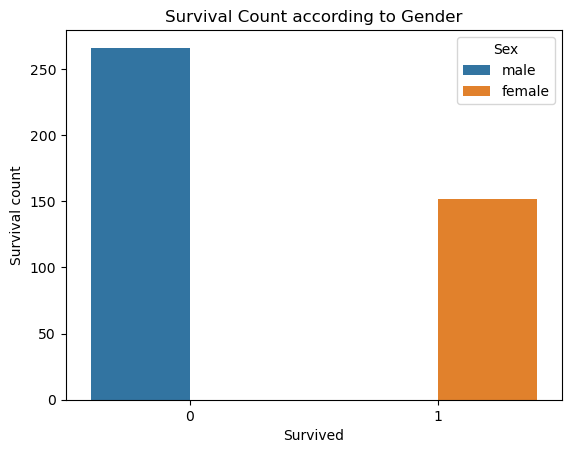

In [21]:
sns.countplot(x='Survived', data=df, hue='Sex')
plt.title('Survival Count according to Gender')
plt.ylabel('Survival count')
plt.show()

## Plot the survival rate by Pclass

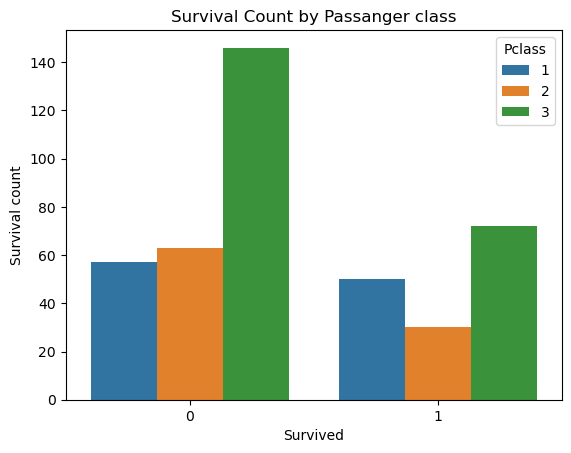

In [22]:
sns.countplot(x='Survived', data=df, hue='Pclass')
plt.title('Survival Count by Passanger class')
plt.ylabel('Survival count')
plt.show()

### Distribution of Age Group

In [23]:
def Age_distribute(n):
    if n>=20 and n<30:
        return '20s'
    elif n>=30 and n<40:
        return '30s'
    elif n>=40 and n<50:
        return '40s'
    elif n>=50 and n<60:
        return '50s'
    else:
        return '60s'

In [24]:
df['AgeGroup']=df['Age'].apply(lambda x:Age_distribute(x))

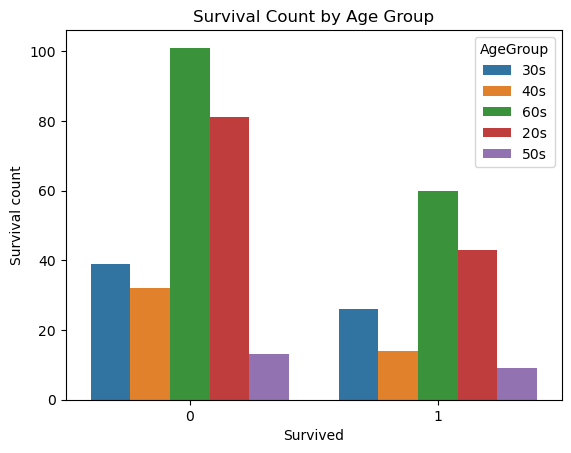

In [25]:
sns.countplot(x='Survived', data=df, hue='AgeGroup')
plt.title('Survival Count by Age Group')
plt.ylabel('Survival count')
plt.show()

Text(0, 0.5, 'Survived')

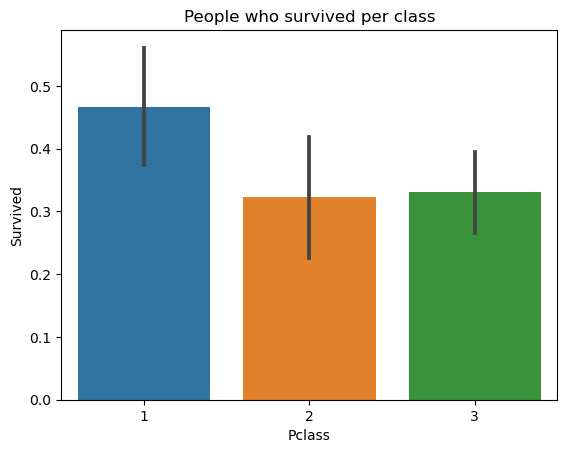

In [26]:
sns.barplot(x = df['Pclass'],
            y = df['Survived'])
plt.title('People who survived per class')
plt.xlabel('Pclass')
plt.ylabel('Survived')

<AxesSubplot:ylabel='None'>

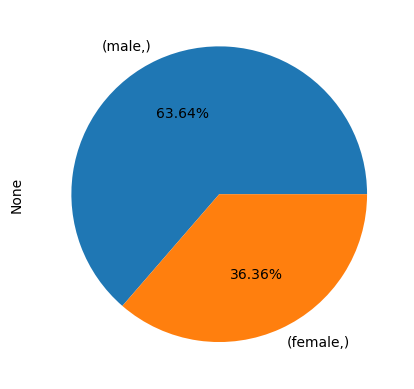

In [27]:
df[['Sex']].value_counts().plot(kind='pie', autopct='%.2f%%' )

## Training and Testing

In [32]:
def data_algo(df,algorithms):    
    results = []   
    xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25, random_state=30)
           
    for algorithm in algorithms:          
        print(f"{algorithm}...")
        
        # Fit the algorithm to the training data
        algorithm.fit(xtrain, ytrain)
        
        # Predict the target variable for the test data
        ypredtest = algorithm.predict(xtest)
        ypredtrain = algorithm.predict(xtrain)

        
        # Calculate the accuracy score
        test_accuracy = accuracy_score(ytest, ypredtest)
        train_accuracy = accuracy_score(ytrain, ypredtrain)
        print(f"Testing Accuracy: {test_accuracy}")
        print(f"Training Accuracy: {train_accuracy}\n")
        
        results.append({'Algorithms':algorithms,'Train_accuracy':train_accuracy,'Test_accuracy':test_accuracy})
        
    model = pd.DataFrame(results)   
    return model
        
algorithms=[
    DecisionTreeClassifier(), 
    KNeighborsClassifier(),  
    RandomForestClassifier(), 
    SVC(), 
    GaussianNB()
] 

df_model = data_algo(df,algorithms) 
df_model.sort_values(by='Train_accuracy', ascending=False)

DecisionTreeClassifier()...
Testing Accuracy: 1.0
Training Accuracy: 1.0

KNeighborsClassifier()...
Testing Accuracy: 0.6285714285714286
Training Accuracy: 0.805111821086262

RandomForestClassifier()...
Testing Accuracy: 1.0
Training Accuracy: 1.0

SVC()...
Testing Accuracy: 0.6190476190476191
Training Accuracy: 0.6613418530351438

GaussianNB()...
Testing Accuracy: 1.0
Training Accuracy: 1.0



,Algorithms,Train_accuracy,Test_accuracy
0,"[DecisionTreeClassifier(), KNeighborsClassifie...",1.000000,1.000000
2,"[DecisionTreeClassifier(), KNeighborsClassifie...",1.000000,1.000000
4,"[DecisionTreeClassifier(), KNeighborsClassifie...",1.000000,1.000000
1,"[DecisionTreeClassifier(), KNeighborsClassifie...",0.805112,0.628571
3,"[DecisionTreeClassifier(), KNeighborsClassifie...",0.661342,0.619048
